# **Ejercicios Valores Perdidos**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


---
### 1. Cargar los datos generados en la práctica número 8
---

In [2]:
data = pd.read_csv("trainmod_with_NAs.csv")

---
### 2. Comprobar el número de valores perdidos, total y por variable
---

In [3]:
def variables_con_nas_count(df):
    """
    Retorna un DataFrame con las variables que tienen NAs y su conteo de NA.
    """
    na_counts = df.isna().sum()
    na_counts = na_counts[na_counts > 0]  # Filtrar solo las que tienen NAs
    return na_counts.to_frame("NA_Count")

- #### Por variable:

In [4]:
missing_counts = data.isna().sum()
print("Valores perdidos por variable:\n", missing_counts)

Valores perdidos por variable:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      347
LotArea            0
                ... 
SaleType           0
SaleCondition      0
SalePrice          0
Crisis             0
Reforma            0
Length: 83, dtype: int64


In [5]:
print("\nVariables con NAs:")
print(variables_con_nas_count(data))



Variables con NAs:
               NA_Count
LotFrontage         347
Alley              1369
YearBuilt             7
MasVnrType            8
MasVnrArea          104
BsmtQual             37
BsmtCond             37
BsmtExposure         38
BsmtFinType1         37
BsmtFinSF1            7
BsmtFinType2         38
BsmtFinSF2          167
BsmtUnfSF            29
TotalBsmtSF          61
Electrical            1
X1stFlrSF            20
X2ndFlrSF             2
LowQualFinSF         26
GrLivArea            31
FireplaceQu         690
GarageType           81
GarageYrBlt          81
GarageFinish         81
GarageArea           21
GarageQual           81
GarageCond           81
WoodDeckSF           32
OpenPorchSF          77
EnclosedPorch       208
X3SsnPorch           24
ScreenPorch         116
PoolQC             1453
Fence              1179
MiscFeature        1406


---

- #### Total:

In [6]:
total_missing = data.isna().sum().sum()
print("\nTotal de valores perdidos en el dataset:", total_missing)


Total de valores perdidos en el dataset: 7977


---
### 3. Realizar la misma operación en porcentajes.
---

In [7]:
data = pd.read_csv("trainmod_with_NAs.csv")

In [8]:
def variables_con_nas_percentage(df):
    """
    Retorna un DataFrame con las variables que tienen NAs y su porcentaje de NA.
    """
    na_percentage = df.isna().mean() * 100
    na_percentage = na_percentage[na_percentage > 0]  # Filtrar solo las que tienen NAs
    return na_percentage.to_frame("NA_Percentage")

- #### Por variable:

In [9]:
missing_percentage = data.isna().mean() * 100
print("Porcentaje de valores perdidos por variable (%):\n", missing_percentage)

Porcentaje de valores perdidos por variable (%):
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      23.767123
LotArea           0.000000
                   ...    
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Crisis            0.000000
Reforma           0.000000
Length: 83, dtype: float64


In [10]:
print("\nVariables con NAs (y su porcentaje):")
print(variables_con_nas_percentage(data))


Variables con NAs (y su porcentaje):
               NA_Percentage
LotFrontage        23.767123
Alley              93.767123
YearBuilt           0.479452
MasVnrType          0.547945
MasVnrArea          7.123288
BsmtQual            2.534247
BsmtCond            2.534247
BsmtExposure        2.602740
BsmtFinType1        2.534247
BsmtFinSF1          0.479452
BsmtFinType2        2.602740
BsmtFinSF2         11.438356
BsmtUnfSF           1.986301
TotalBsmtSF         4.178082
Electrical          0.068493
X1stFlrSF           1.369863
X2ndFlrSF           0.136986
LowQualFinSF        1.780822
GrLivArea           2.123288
FireplaceQu        47.260274
GarageType          5.547945
GarageYrBlt         5.547945
GarageFinish        5.547945
GarageArea          1.438356
GarageQual          5.547945
GarageCond          5.547945
WoodDeckSF          2.191781
OpenPorchSF         5.273973
EnclosedPorch      14.246575
X3SsnPorch          1.643836
ScreenPorch         7.945205
PoolQC             99.520548
Fence

---

- #### Total (en porcentaje respecto al total de valores del DataFrame):

In [11]:
total_cells = data.shape[0]*data.shape[1]
total_missing_percentage = (total_missing/total_cells)*100
print("\nPorcentaje total de valores perdidos en el dataset: {:.2f}%".format(total_missing_percentage))


Porcentaje total de valores perdidos en el dataset: 6.58%


---
### 4. Eliminar aquellas variables que tengan más de un 30% de valores perdidos.
---

In [12]:
threshold = 0.30
cols_to_drop = data.columns[data.isna().mean() > threshold]
data = data.drop(columns=cols_to_drop)
print("Columnas eliminadas por superar el 30% de NAs:", cols_to_drop.tolist())

Columnas eliminadas por superar el 30% de NAs: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


---
### 5. Calcular el porcentaje de valores perdidos una vez eliminadas esas variables
---

In [13]:
missing_percentage_after = data.isna().mean() * 100
print("Porcentaje de valores perdidos por variable tras eliminación:\n", missing_percentage_after)

Porcentaje de valores perdidos por variable tras eliminación:
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      23.767123
LotArea           0.000000
                   ...    
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Crisis            0.000000
Reforma           0.000000
Length: 78, dtype: float64


In [14]:
print("Porcentaje de valores perdidos tras eliminación (>30%):")
print(variables_con_nas_percentage(data))

Porcentaje de valores perdidos tras eliminación (>30%):
               NA_Percentage
LotFrontage        23.767123
YearBuilt           0.479452
MasVnrType          0.547945
MasVnrArea          7.123288
BsmtQual            2.534247
BsmtCond            2.534247
BsmtExposure        2.602740
BsmtFinType1        2.534247
BsmtFinSF1          0.479452
BsmtFinType2        2.602740
BsmtFinSF2         11.438356
BsmtUnfSF           1.986301
TotalBsmtSF         4.178082
Electrical          0.068493
X1stFlrSF           1.369863
X2ndFlrSF           0.136986
LowQualFinSF        1.780822
GrLivArea           2.123288
GarageType          5.547945
GarageYrBlt         5.547945
GarageFinish        5.547945
GarageArea          1.438356
GarageQual          5.547945
GarageCond          5.547945
WoodDeckSF          2.191781
OpenPorchSF         5.273973
EnclosedPorch      14.246575
X3SsnPorch          1.643836
ScreenPorch         7.945205


---
### 6. Realizar dos análisis gráficos sobre la distribución de los valores perdidos
---

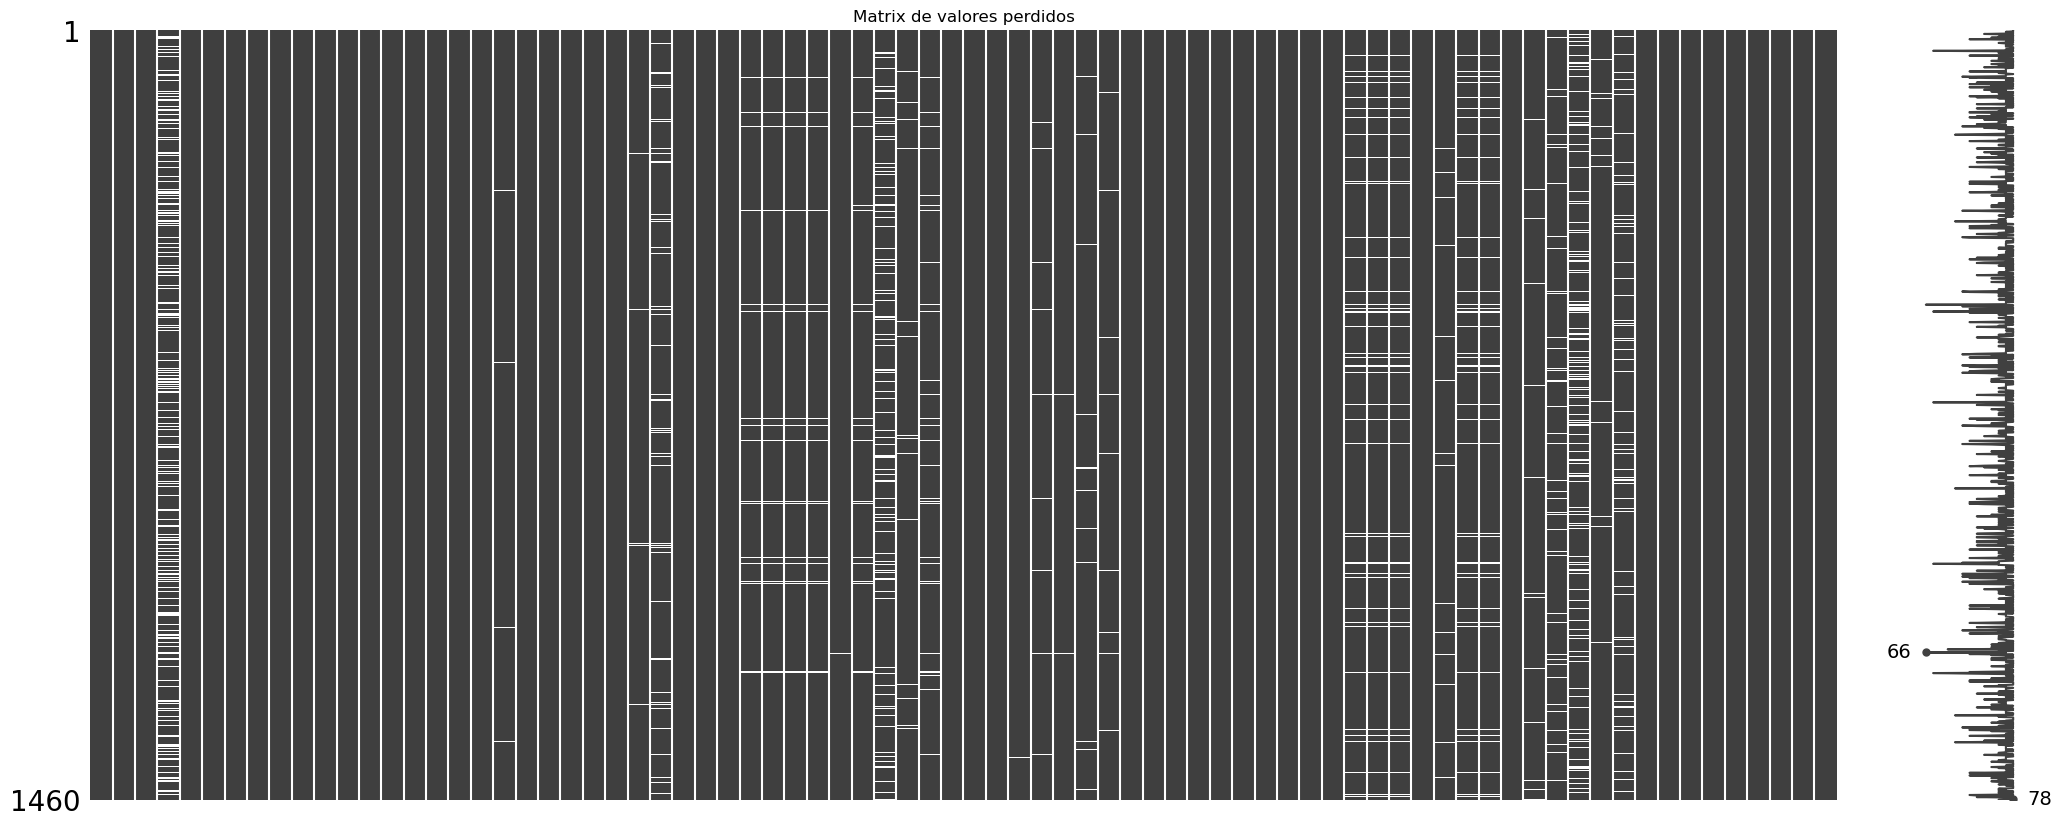

In [15]:
msno.matrix(data)
plt.title("Matrix de valores perdidos")
plt.show()

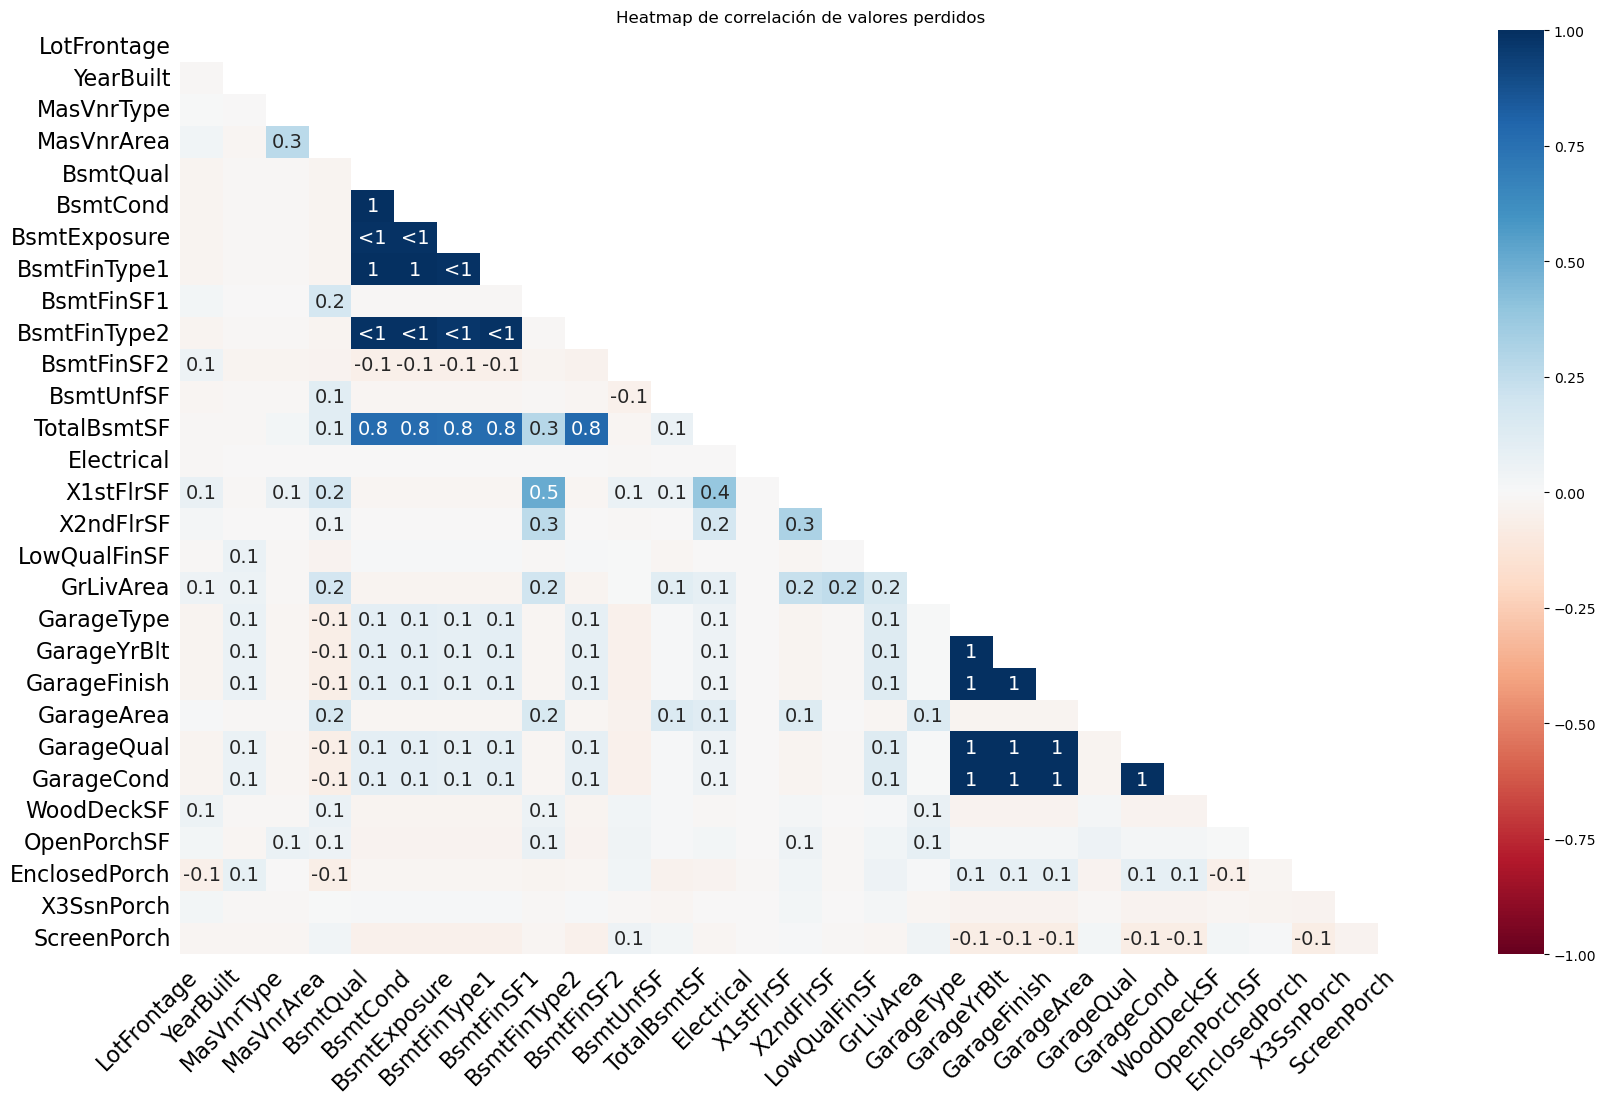

In [16]:
msno.heatmap(data)
plt.title("Heatmap de correlación de valores perdidos")
plt.show()

/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_85207/501645765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Variable", y="NA_Count", data=na_df, palette="viridis")


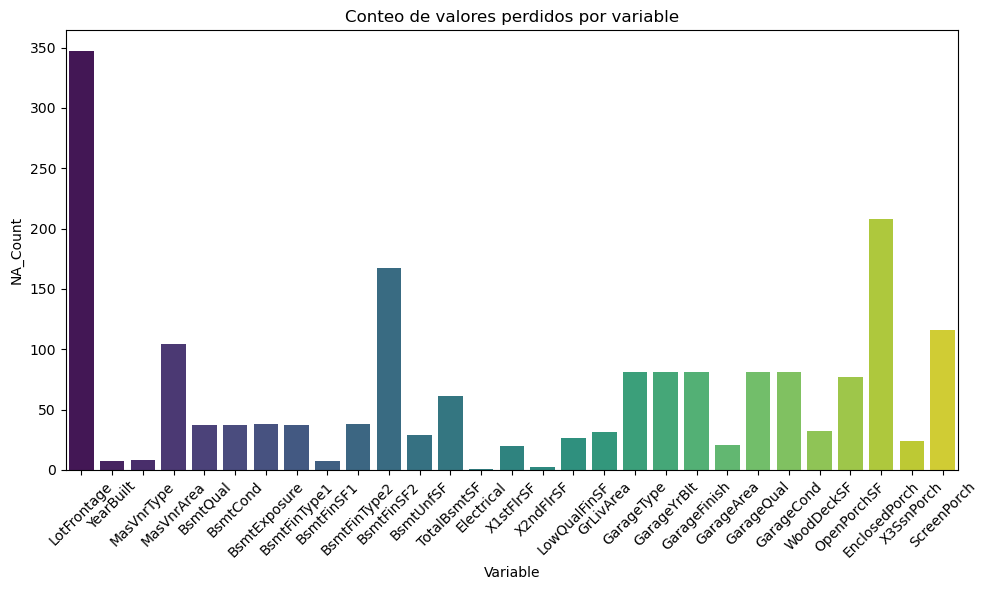

In [17]:
# Gráfico de barras con seaborn para las variables con NAs
na_df = variables_con_nas_count(data).reset_index()
na_df.columns = ["Variable", "NA_Count"]
plt.figure(figsize=(10, 6))
sns.barplot(x="Variable", y="NA_Count", data=na_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Conteo de valores perdidos por variable")
plt.tight_layout()
plt.show()

---
### 7. Eliminar de las tres primeras variables los NAs (sin incluir la Id)
---

Primero, identificamos las tres primeras variables numéricas o de interés (excluyendo Id)

In [18]:
cols = [c for c in data.columns if c.lower() != 'id']  # Excluir Id si existe
first_three = cols[:3]  # tomar las primeras tres
print("Primera tres variables sin incluir Id:", first_three)

Primera tres variables sin incluir Id: ['MSSubClass', 'MSZoning', 'LotFrontage']


In [19]:
# Eliminamos las tres primeras variables
data = data.dropna(subset=first_three)

---
### 8. Eliminar de todas las variables los valores perdidos
---

In [20]:
data = data.dropna()

---
### 9. Comprobar que no existen valores perdidos
---

In [21]:
print("Comprobación de NAs totales:", data.isna().sum().sum())  # Debería dar 0

Comprobación de NAs totales: 0


---
### 10. Volver a cargar los datos
---

In [22]:
# Volvemos al estado original antes de las limpiezas anteriores
data = pd.read_csv("trainmod_with_NAs.csv")

---
### 11. Eliminar aquellas variables que tengan más de un 30% de valores perdidos
---

Repetimos el proceso del paso 4

In [23]:
threshold = 0.30
cols_to_drop = data.columns[data.isna().mean() > threshold]
data = data.drop(columns=cols_to_drop)

---
### 12. Imputar la media para estimar los valores perdidos
---

In [24]:
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].mean(), inplace=True)

---
### 13. Comprobar que no existen valores perdidos
---

In [25]:
print("NAs después de imputación con la media:", data.isna().sum().sum())

NAs después de imputación con la media: 520


---
### 14. En caso de que no se haya eliminado explicar a qué puede deberse
---

In [27]:
print("\nVariables con NAs:")
print(variables_con_nas_count(data))


Variables con NAs:
              NA_Count
MasVnrType           8
BsmtQual            37
BsmtCond            37
BsmtExposure        38
BsmtFinType1        37
BsmtFinType2        38
Electrical           1
GarageType          81
GarageFinish        81
GarageQual          81
GarageCond          81


# 🤔

In [28]:
print(type(data["GarageType"][0]))

<class 'str'>


# 😒

In [29]:
data["GarageType"].head(13)

0      Attchd
1      Attchd
2      Attchd
3      Detchd
4      Attchd
5      Attchd
6      Attchd
7      Attchd
8      Detchd
9      Attchd
10     Detchd
11    BuiltIn
12     Detchd
Name: GarageType, dtype: object

# 😱

### **Hay variables categóricas  !!!**

- #### Eso significa que en vez de por la media, devería de imputar las variables categóricas mediante **_la moda_** 
# 😏 


In [30]:
def imputar_categoricas_moda(df):
    """
    Imputa valores perdidos en variables categóricas utilizando la moda de cada variable.
    Modifica el DataFrame original.
    """
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        if df[col].isna().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

In [31]:
imputar_categoricas_moda(data)

In [32]:
print("NAs después de imputación con la media:", data.isna().sum().sum())

NAs después de imputación con la media: 0


---
### 15. Volver a cargar los datos
---

In [33]:
data = pd.read_csv("trainmod_with_NAs.csv")

---
### 16. Eliminar aquellas variables que tengan más de un 30% de valores perdidos
---

In [34]:
cols_to_drop = data.columns[data.isna().mean() > 0.30]
data = data.drop(columns=cols_to_drop)

---
### 17. Imputar los valores perdidos utilizando la imputación múltiple
---

In [35]:
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer

# Separar numéricas y categóricas
numeric_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

numeric_data = data[numeric_cols]
categorical_data = data[cat_cols]

# Imputación iterativa para numéricas
imputer = IterativeImputer(random_state=0)
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Reconstruir el DataFrame numérico imputado
numeric_data_imputed = pd.DataFrame(numeric_data_imputed, columns=numeric_cols, index=data.index)

# Combinar numéricas imputadas con categóricas originales
data = pd.concat([numeric_data_imputed, categorical_data], axis=1)

# Ahora imputar las categóricas con la moda en caso de que queden NAs
imputar_categoricas_moda(data)

---
### 18. Comprobar no existen valores perdidos
---


In [36]:
print("NAs después de imputación múltiple y moda en categóricas:", data.isna().sum().sum())

NAs después de imputación múltiple y moda en categóricas: 0


---
### 19. Guardar los datos
---

In [38]:
data.to_csv("data_imputada.csv", index=False)
print("Datos guardados en data_imputada.csv")

Datos guardados en data_imputada.csv
